In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ulises\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
def generar_nube_de_palabras(text):
    wordcloud = WordCloud(width=800, height=400, background_color="white", 
                          colormap="viridis", max_words=50).generate(text)
    
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [46]:
def quitar_stop_words(texto):
    stop_words = set(stopwords.words('spanish'))
    texto_sin_stop_words = ' '.join([palabra for palabra in texto.split() if palabra.lower() not in stop_words])
    return texto_sin_stop_words

In [23]:
def visualize(**images):
    n = len(images)
    plt.figure(figsize=(32, 10))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [43]:
def plot_histogram_or_countplot(df, column):
    fig, ax = plt.subplots()
    if df[column].dtype == 'O':
        if column == 'País':
            country_counts = df[column].value_counts()
            top_n = 5
            countries_to_plot = country_counts.index[:top_n]
            df_to_plot = df[df[column].isin(countries_to_plot)]
            sns.countplot(x=column, data=df_to_plot, ax=ax)
        else:
            sns.countplot(x=column, data=df, ax=ax)
        ax.set_ylabel('Frecuencia')
    else:
        ax.hist(df[column])
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')
        ax.set_title(f'Histograma de {column}')
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)
    return image


In [11]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

## Limpiar Dataset

Algunos pasos para procesar las opiniones: tener todos los comentarios en un mismo idioma, pasar todo el texto a minusculas y quitar stop words. 

In [19]:
xls = pd.ExcelFile('./Opiniones Tripadvisor_nlp_2023.xlsx')
sheet_to_df_map = {}
places = []
for sheet_name in xls.sheet_names:
    sheet_to_df_map[sheet_name] = xls.parse(sheet_name)
    places.append(sheet_name)

Basilica Colegiata 560 4.5 0.67
39.72 29.41


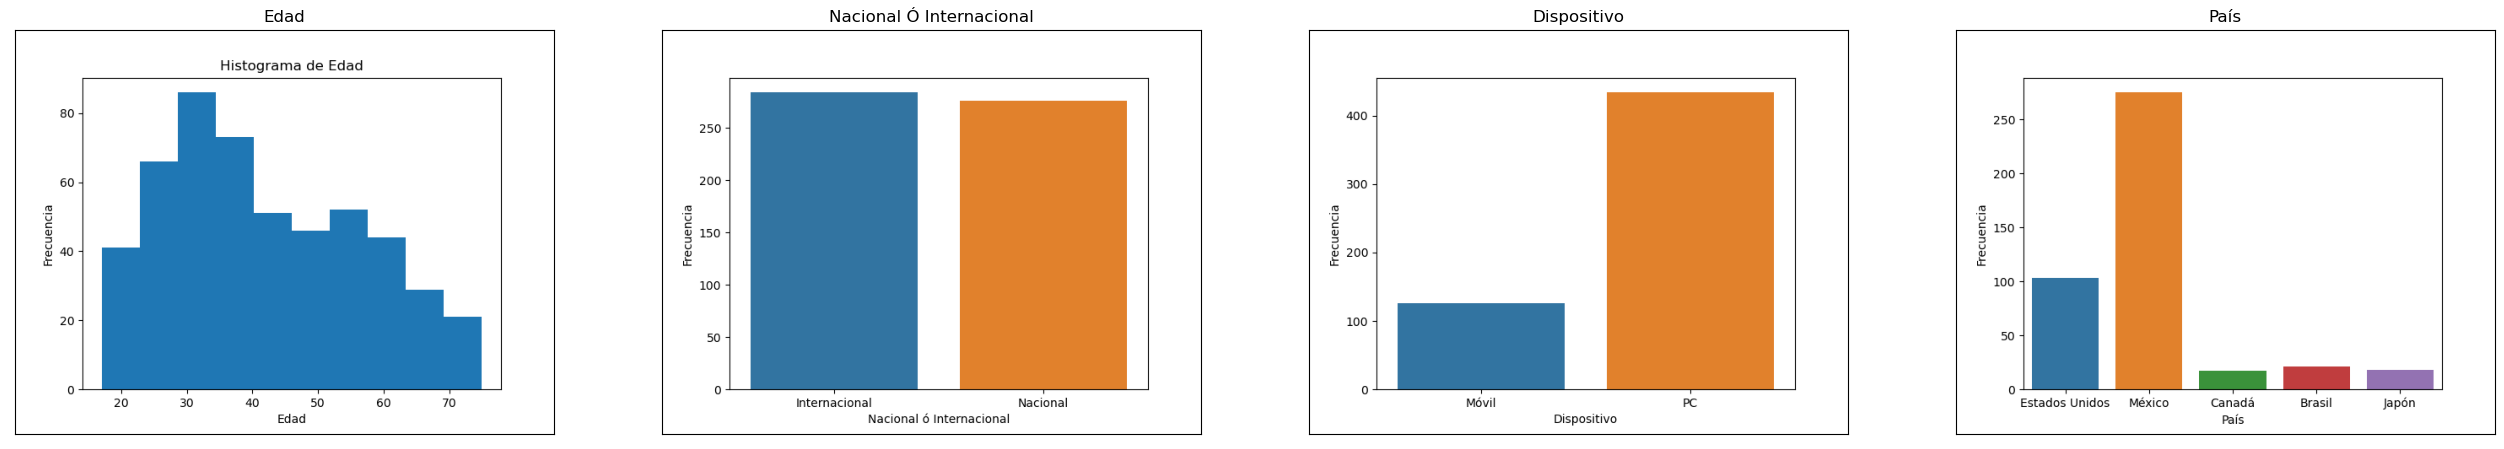

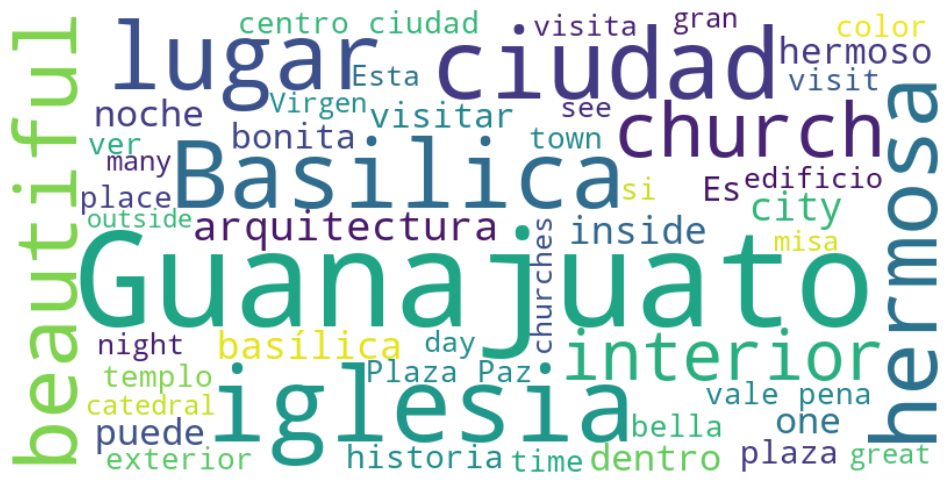

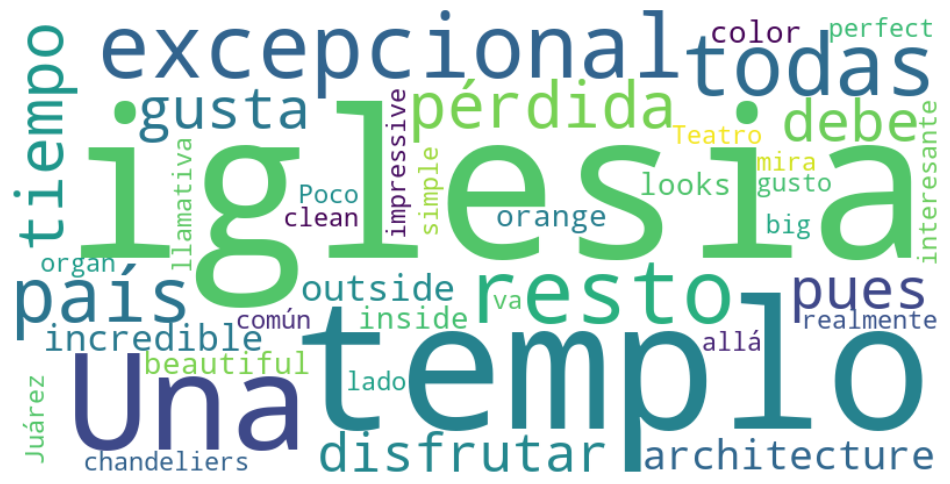

Mercado Hidalgo 600 3.95 0.95
45.62 33.47


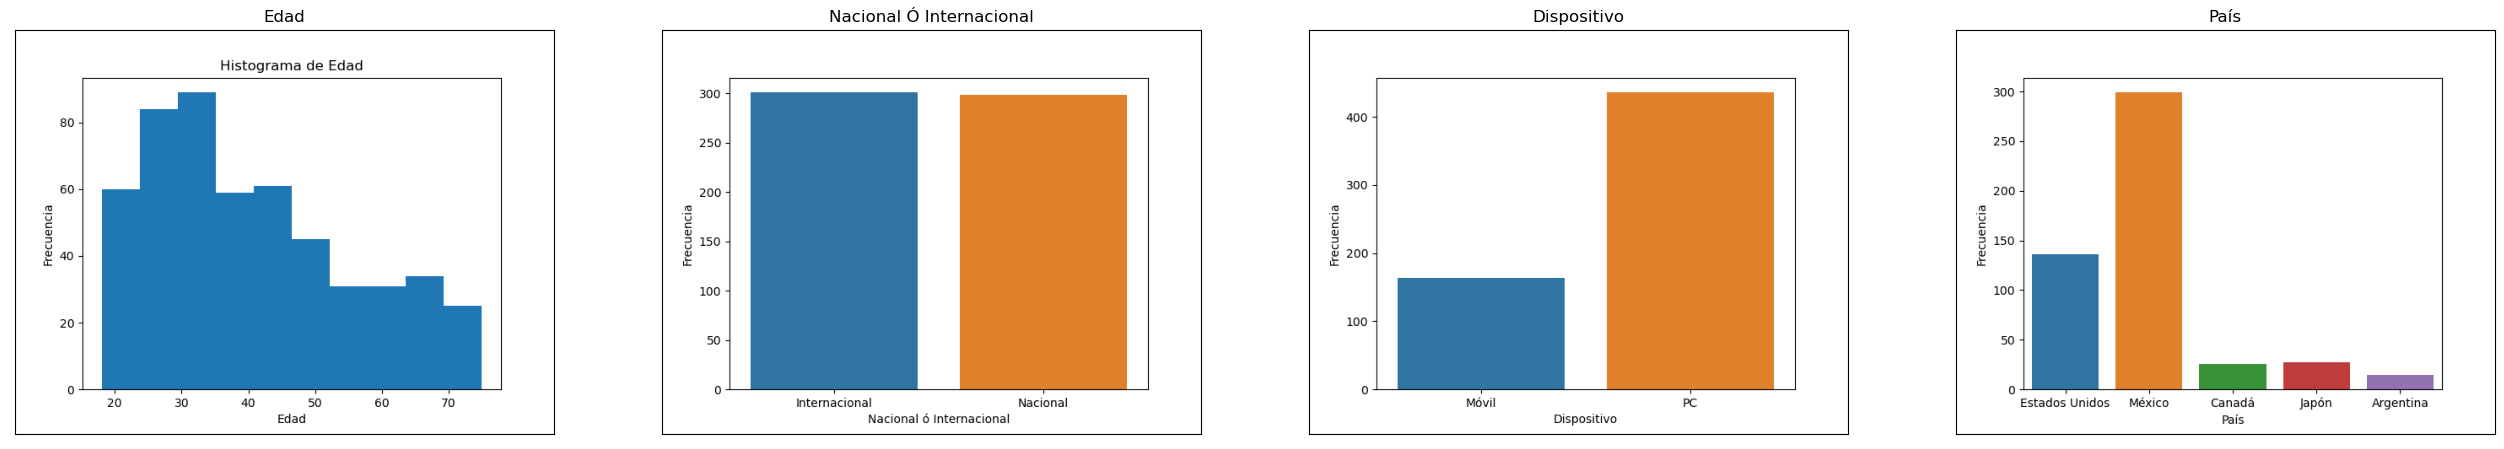

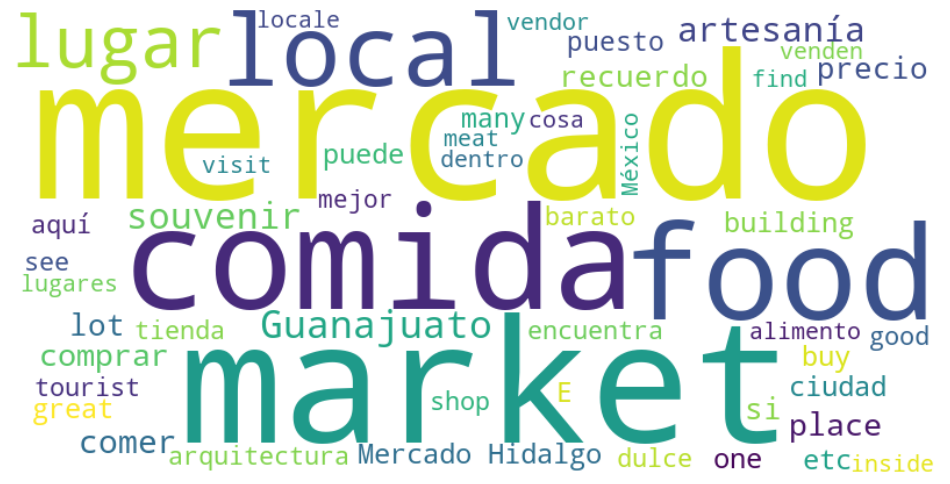

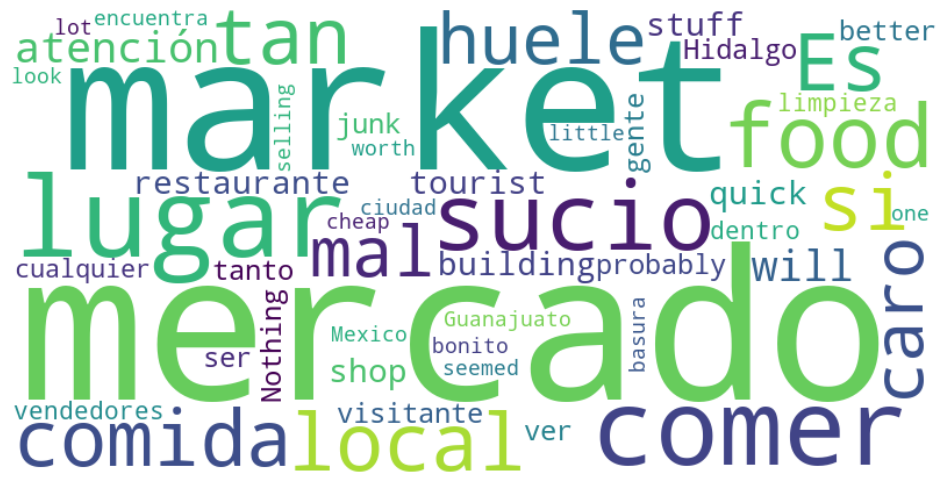

Casa de Diego Rivera 698 4.24 0.8
49.28 30.47


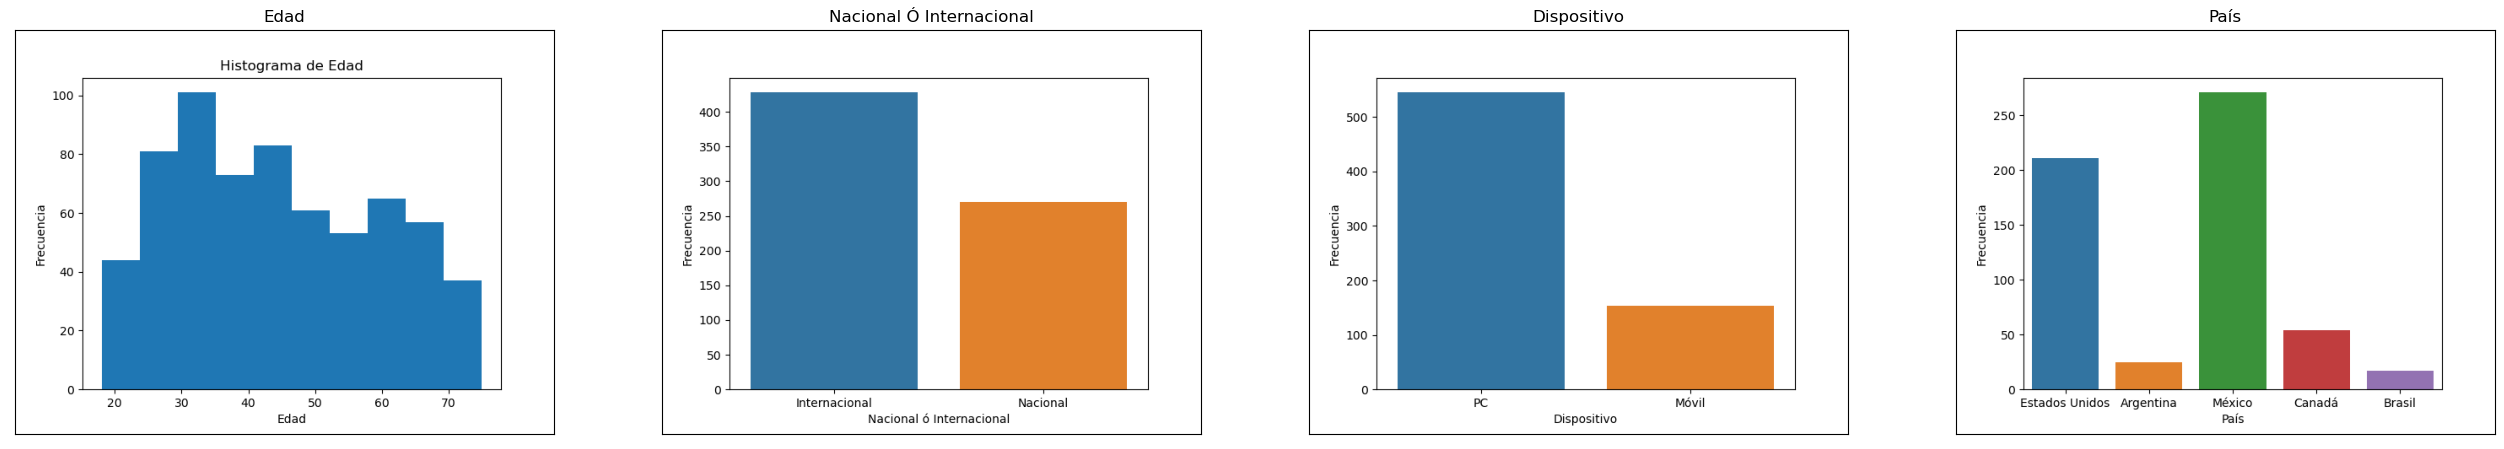

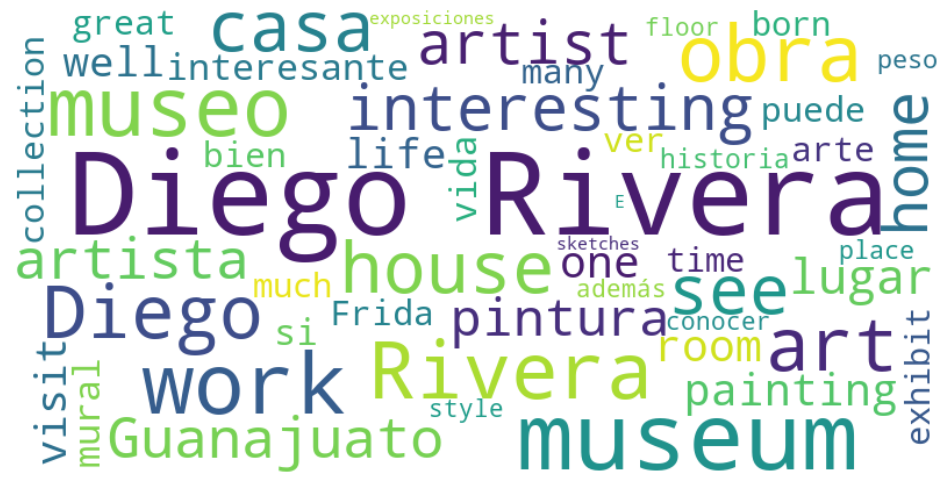

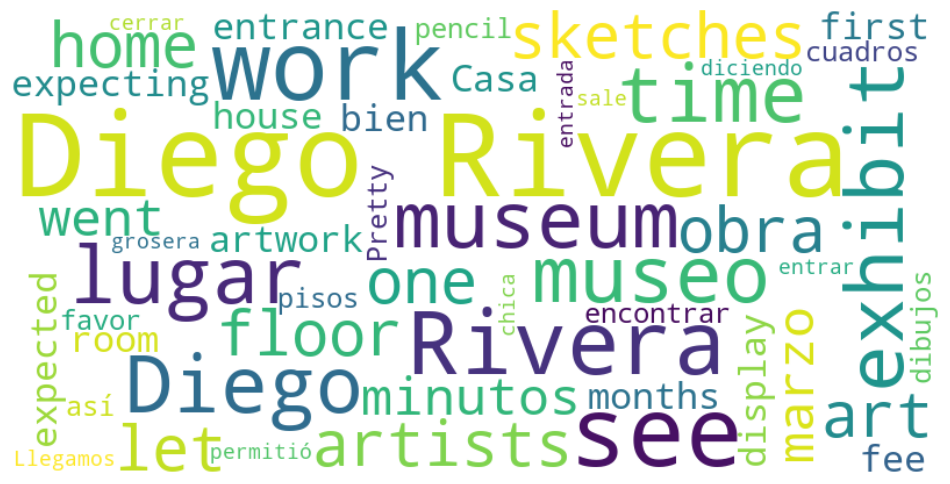

Universidad de Guanajuato 900 4.6 0.61
35.39 20.04


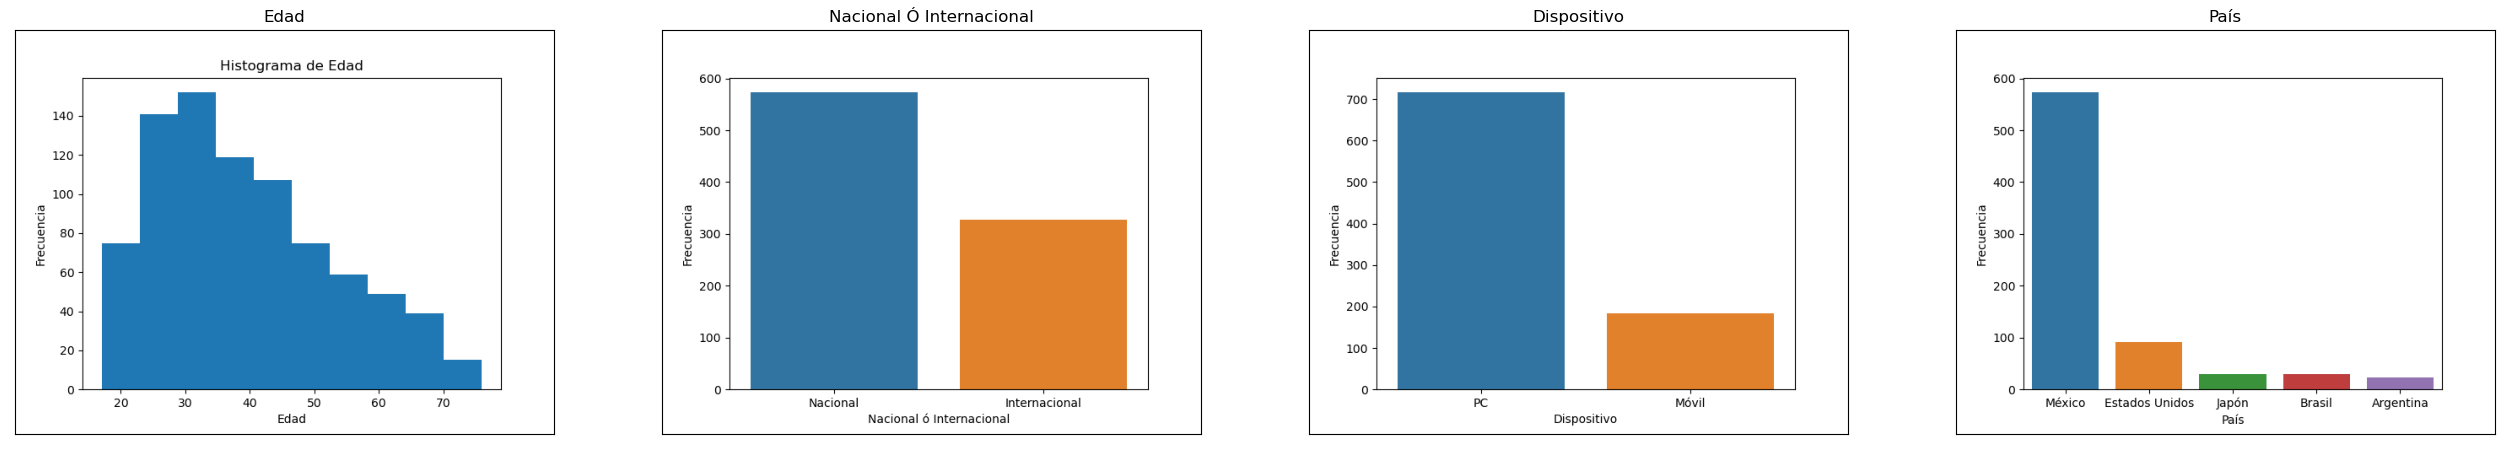

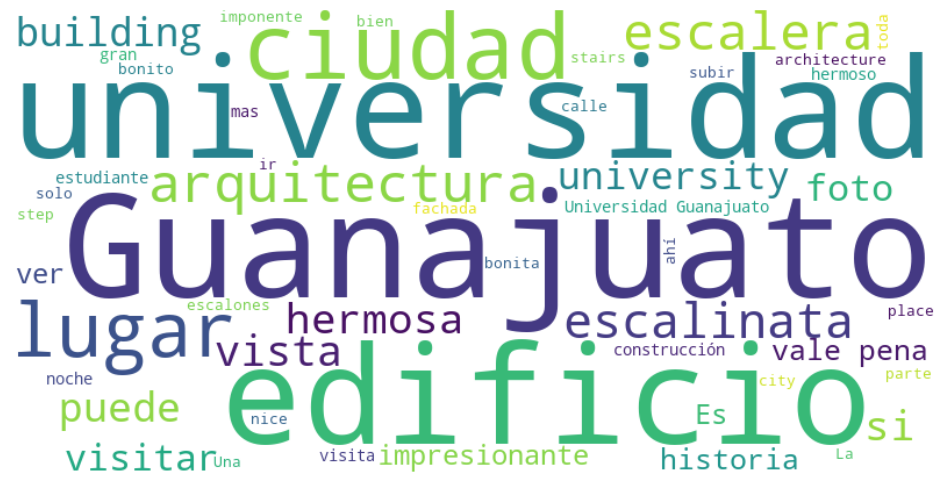

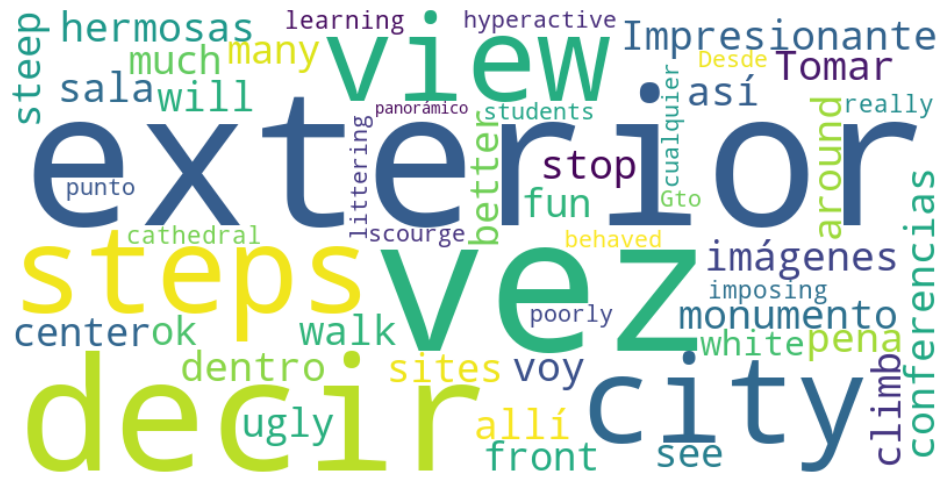

Alhóndiga 930 4.45 0.75
46.5 33.82


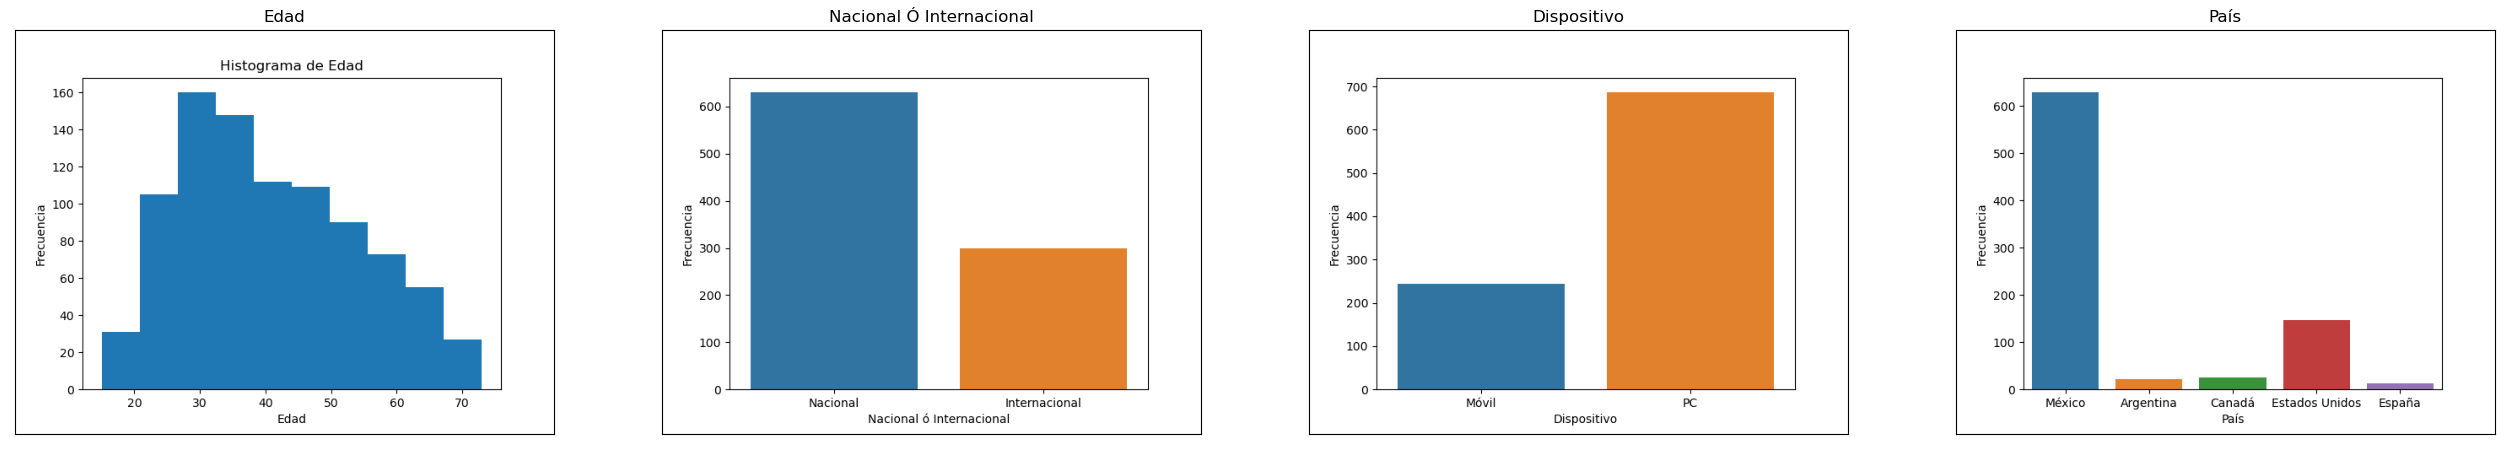

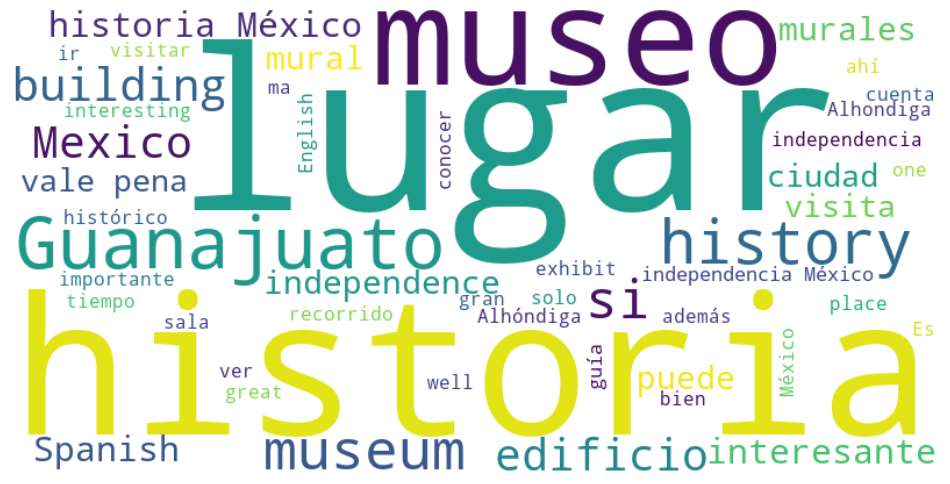

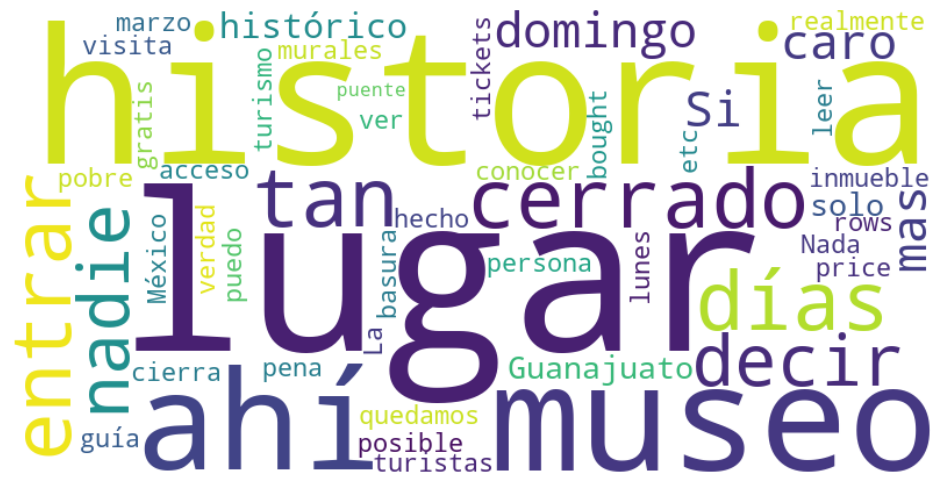

Teatro Juárez 1,010 4.7 0.52
41.51 27.09


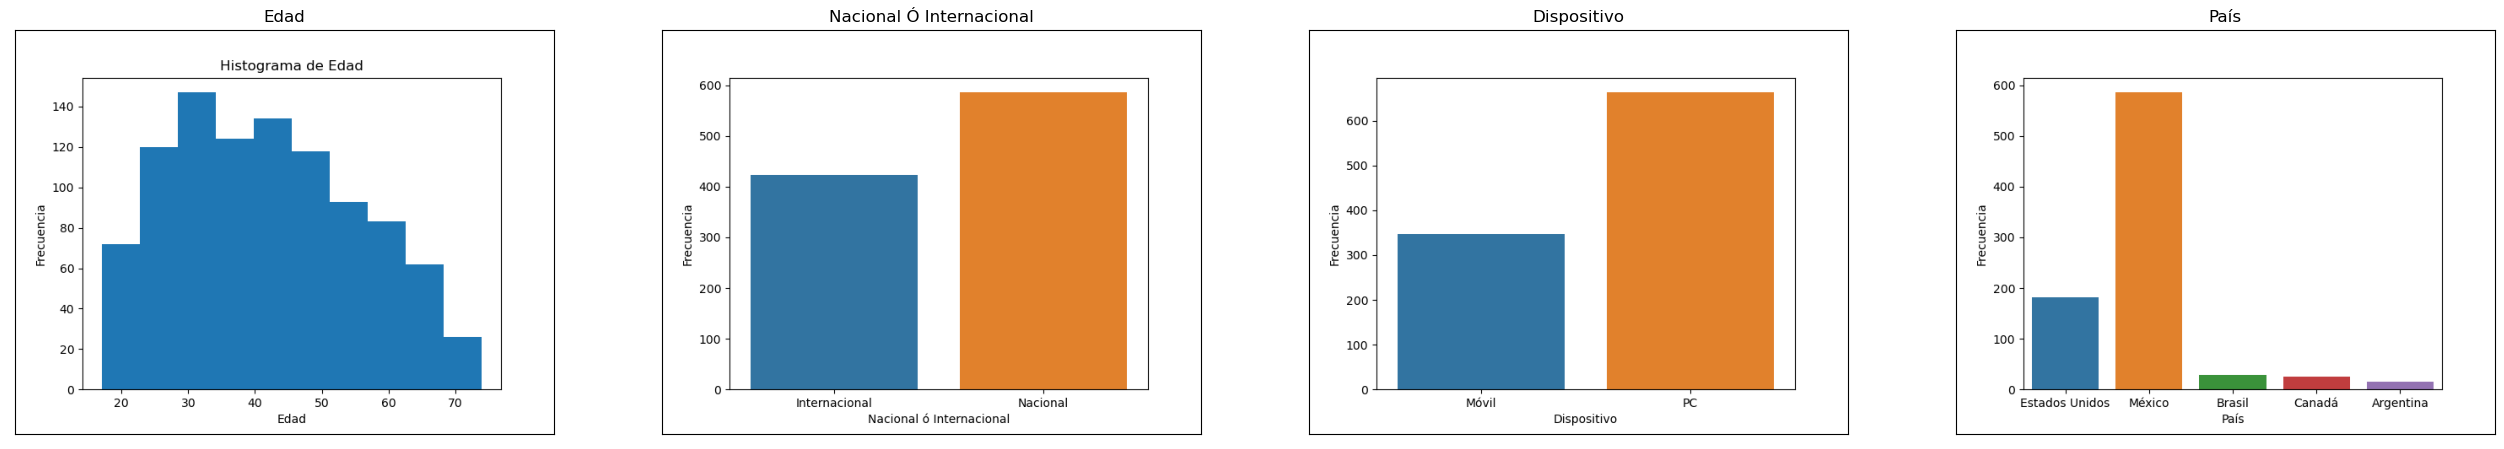

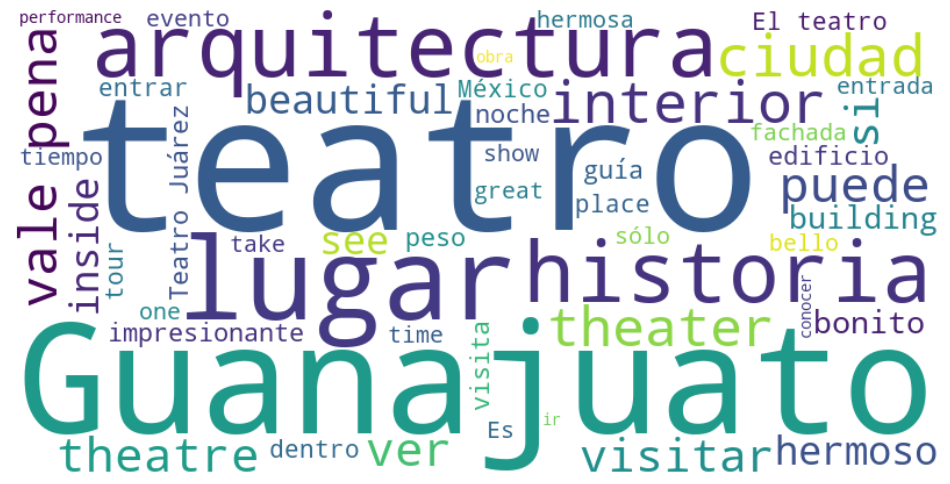

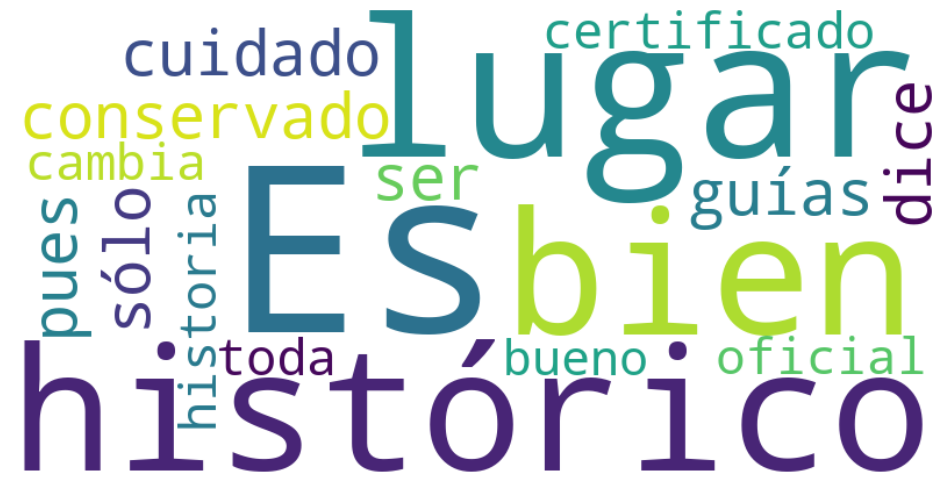

Jardín de la Unión 1,134 4.59 0.61
43.12 36.8


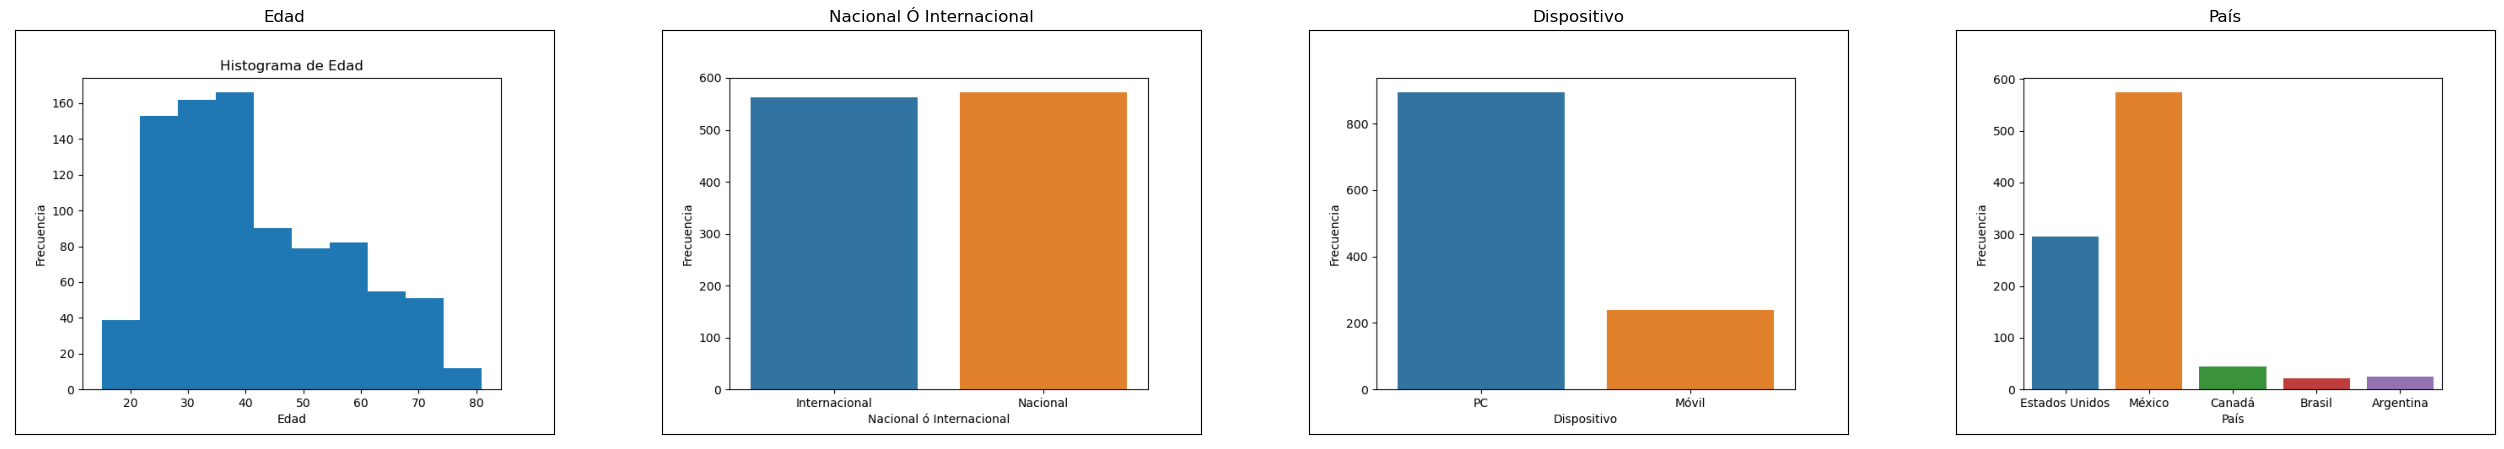

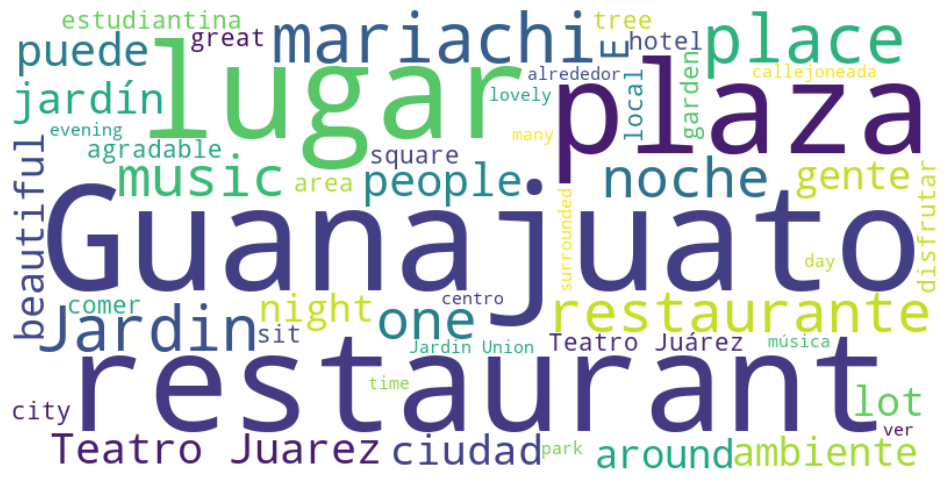

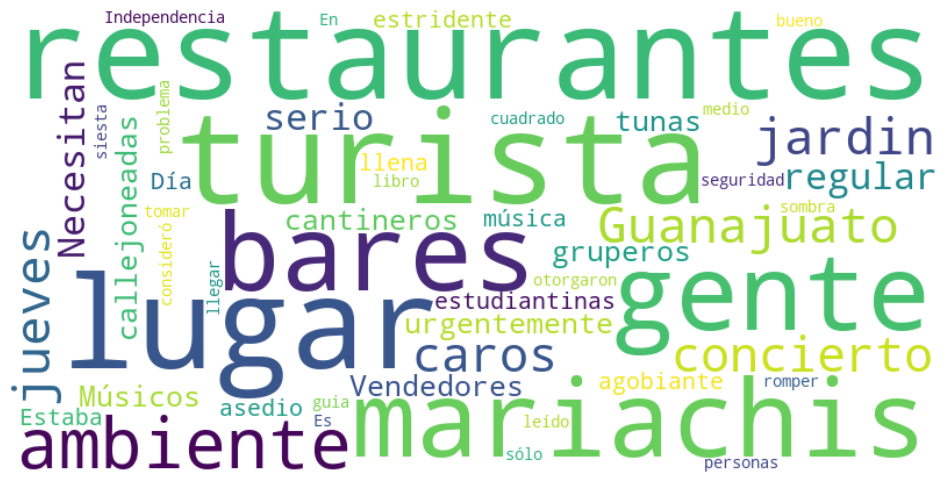

Callejón del Beso 1,360 4.0 0.97
45.52 32.87


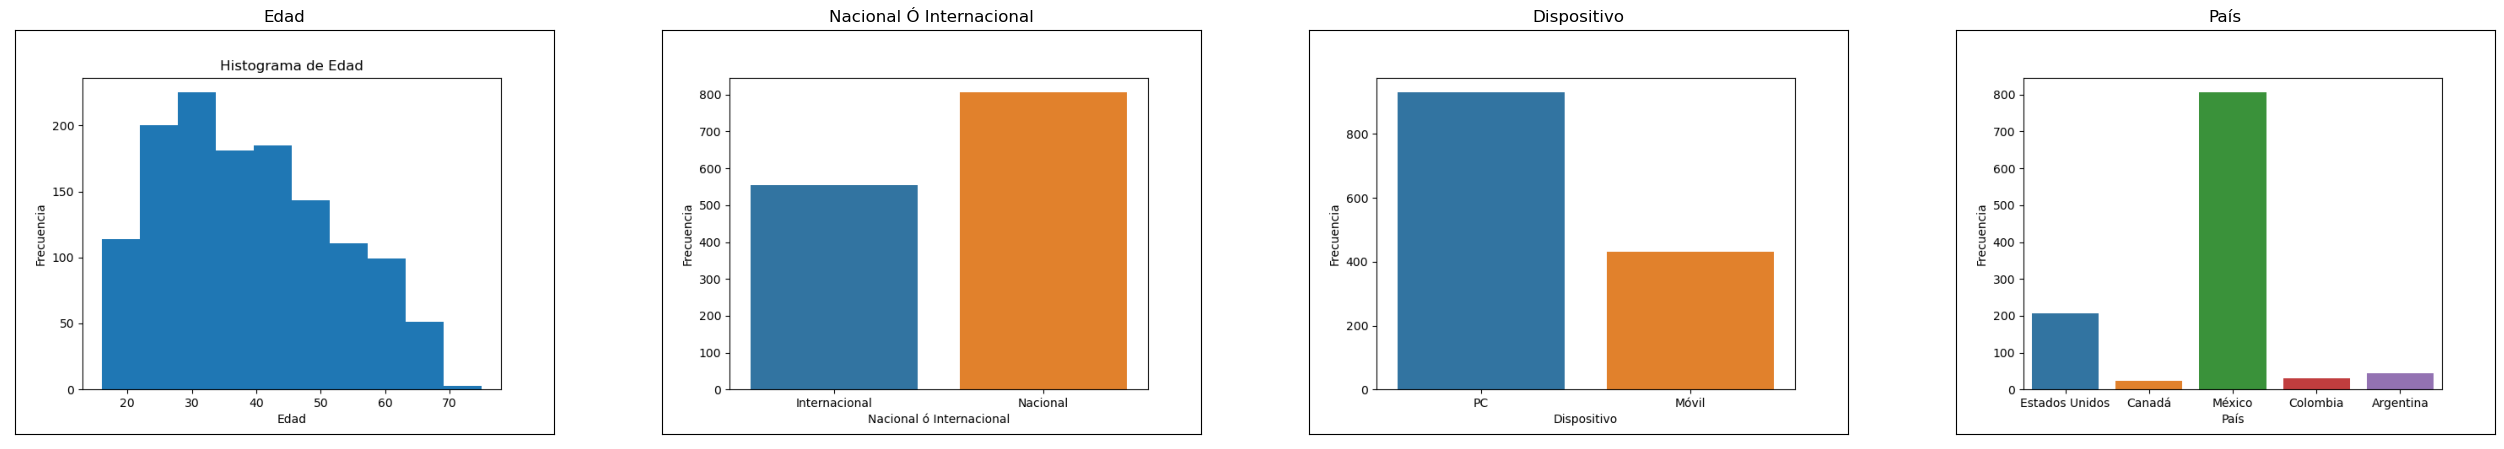

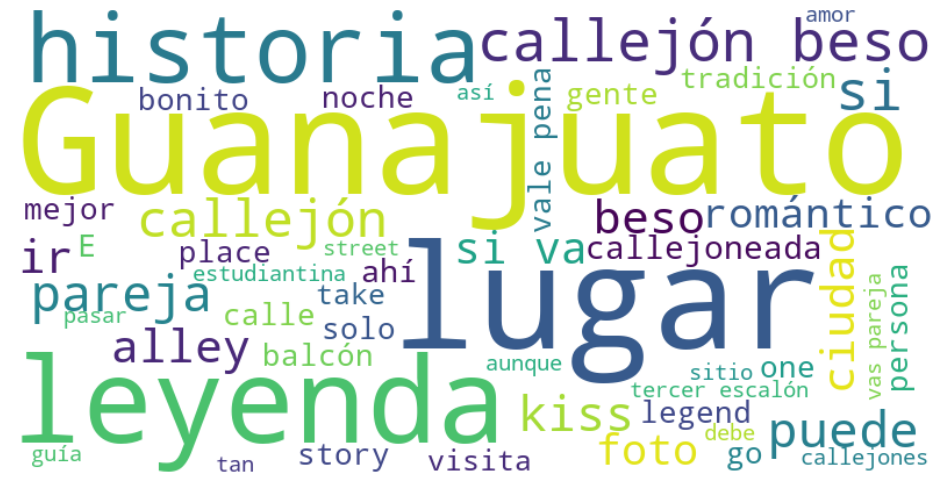

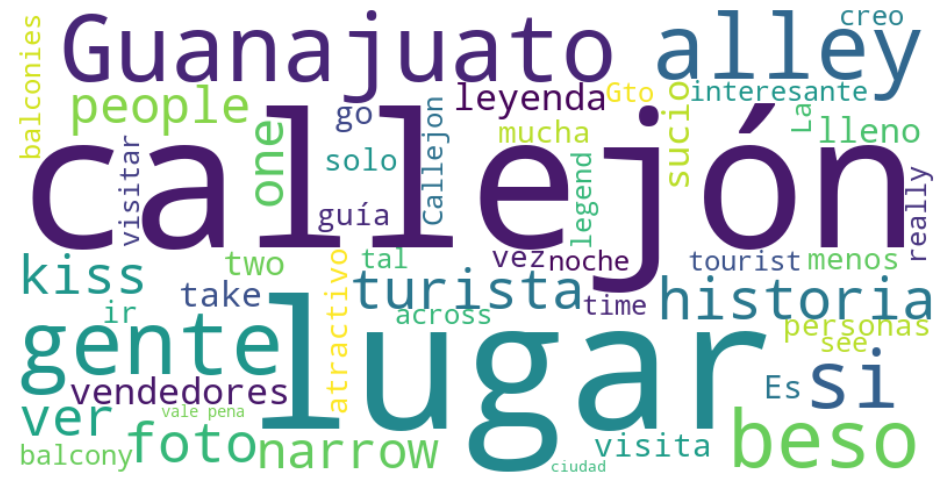

Monumento Pípila 1,620 4.38 0.77
47.35 35.76


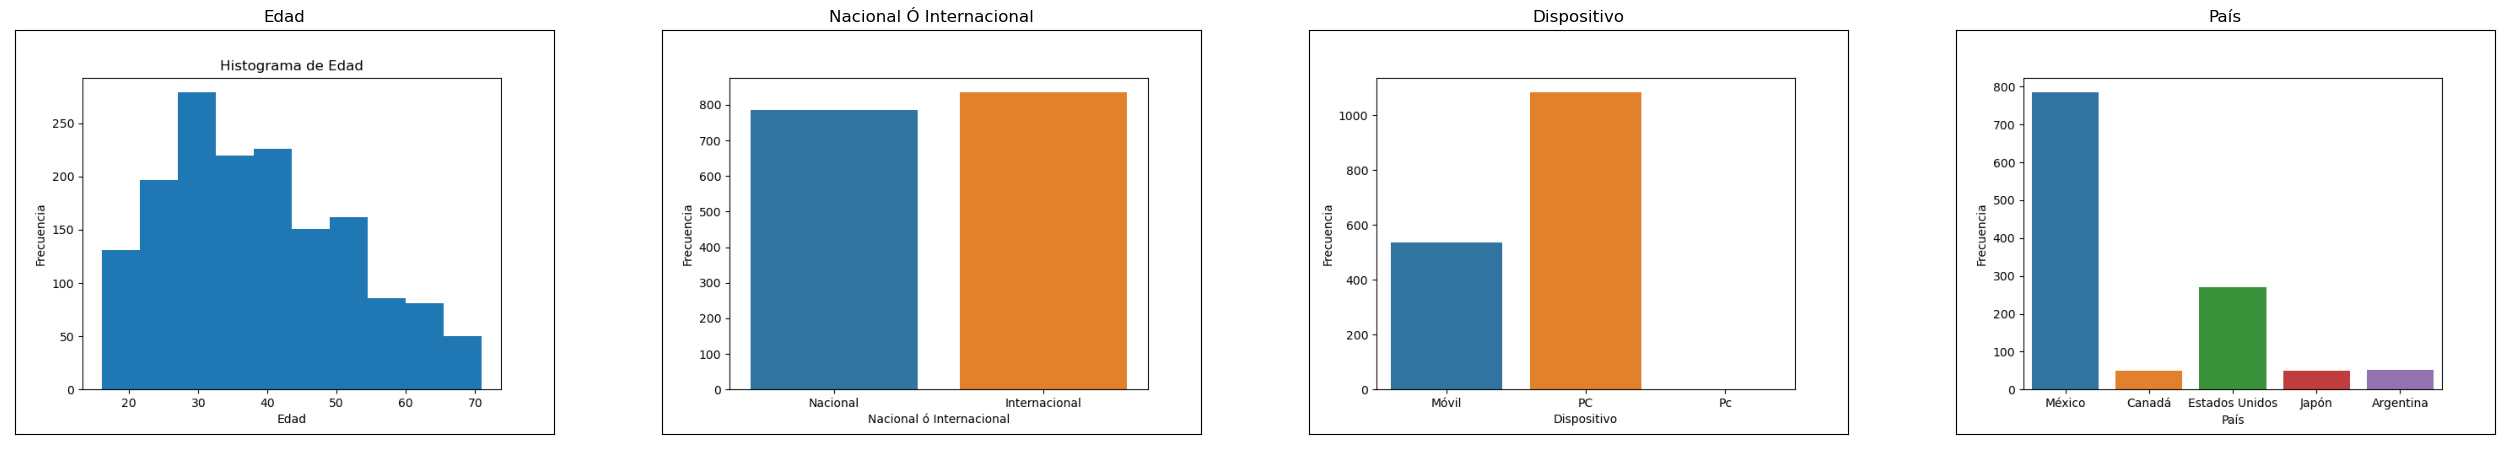

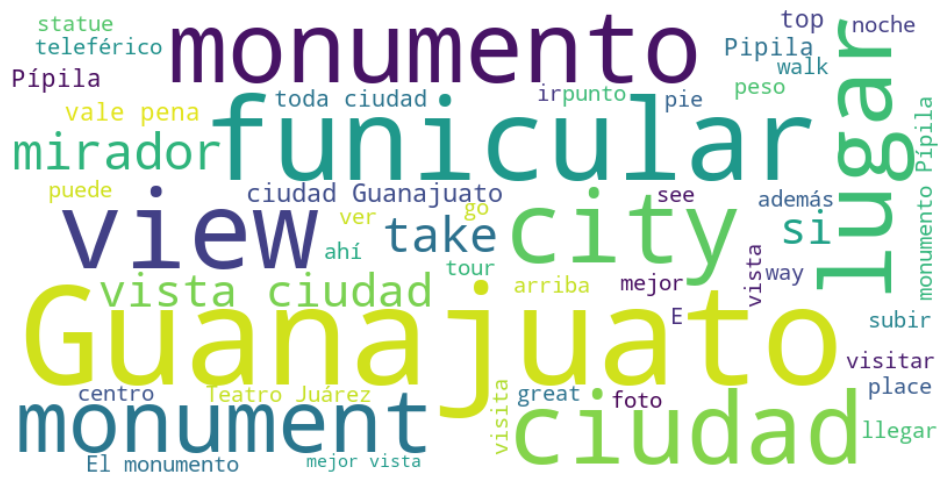

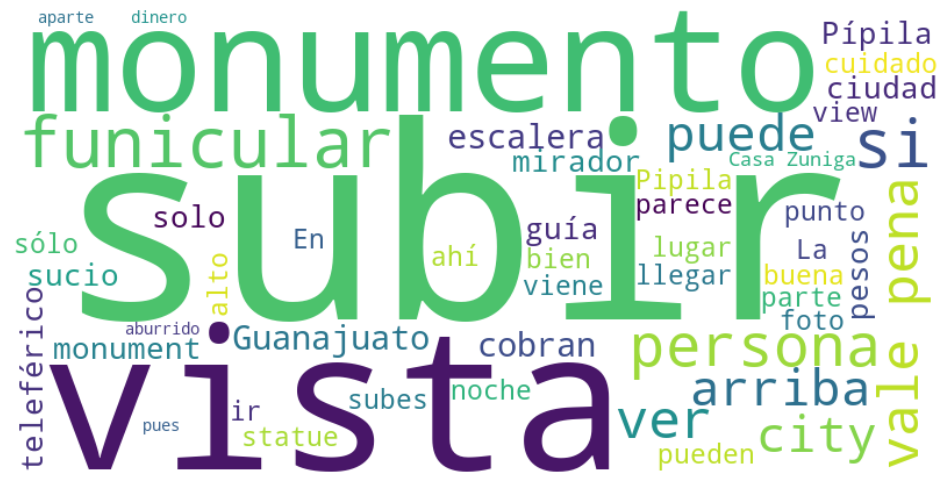

Museo de las Momias 1,650 3.68 1.14
58.15 46.26


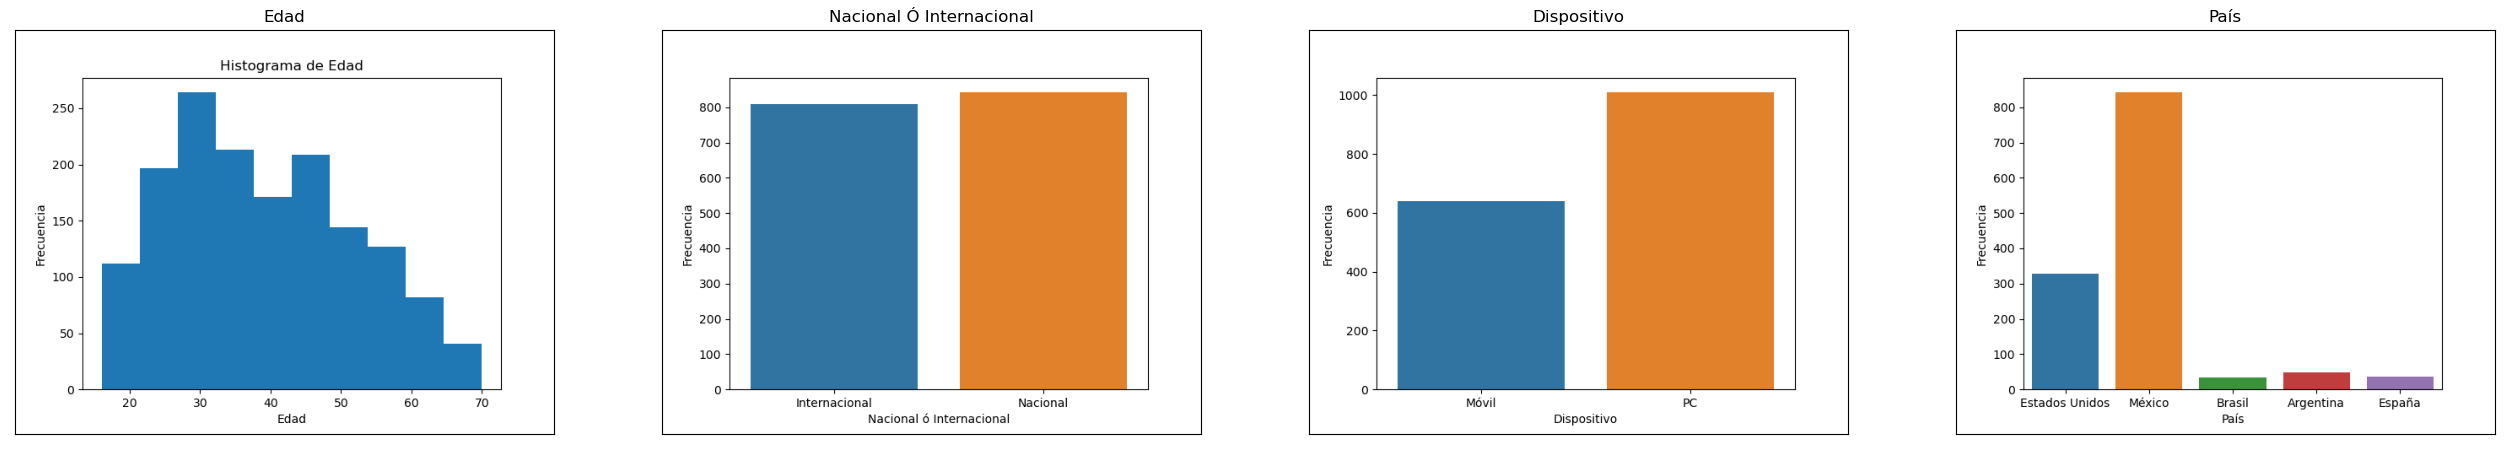

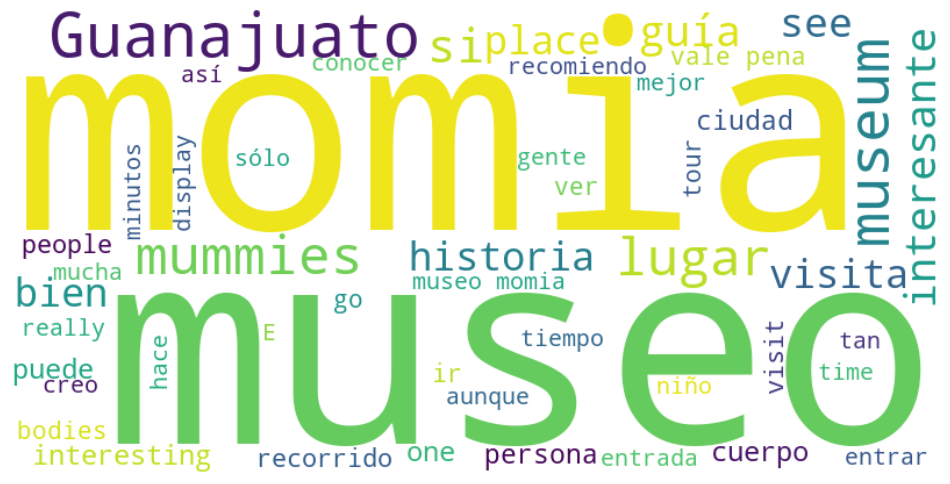

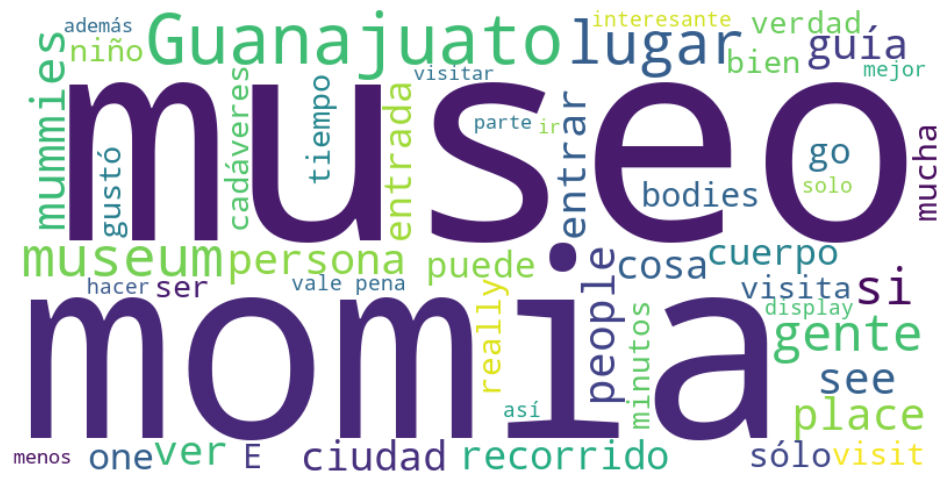

In [48]:

for place in places:
    df = pd.DataFrame(data = sheet_to_df_map[place])
    score_mean = round(df['Escala'].mean(axis=0),2)
    standar_desviation = round(df['Escala'].std(),2)
    print(place, score_mean ,standar_desviation)

    opinion_lengths = df['Opinión'].str.split(' ').str.len()
    #print(opinion_lengths)
    lenght_mean = round(opinion_lengths.mean(axis=0),2)
    lenght_std = round(opinion_lengths.std(),2)
    print(lenght_mean, lenght_std)
    #col_name = normalize(col)
    columns = ['Edad','Nacional ó Internacional', 'Dispositivo','País']
    images = {}
    for col in columns:      
        images[col] = plot_histogram_or_countplot(df, col)

    visualize(**images)
     
    texto = ' '.join(df["Opinión"])
    text = quitar_stop_words(texto)
    generar_nube_de_palabras(text)

    negative_text = ' '.join(df[df['Escala'] <= 2]["Opinión"])
    negative_text = quitar_stop_words(negative_text)
    generar_nube_de_palabras(negative_text)
    